## Libraries 

In [1]:
!pip install pycaret[full]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached MarkupSafe-2.1.1-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (25 kB)
  Attempting uninstall: MarkupSafe
    Found existing installation: MarkupSafe 2.0.1
    Uninstalling MarkupSafe-2.0.1:
      Successfully uninstalled MarkupSafe-2.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
!pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached MarkupSafe-2.0.1-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (31 kB)
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [3]:
from pycaret.anomaly import *
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from pycaret.anomaly import *
from pycaret.datasets import get_data
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import DBSCAN
from tqdm import tqdm
from sklearn.manifold import TSNE
from tqdm import tqdm
plt.rcParams["figure.figsize"] = (10,5)

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [4]:
def getConfusionMatrix(y_pred,y_test,title):
    """plot the confusion matrix of a model
    Input:  y_pred, y_test
    Output: print the confusion matrix
    """
     
    cm = confusion_matrix(y_test, y_pred, labels=[1,0])
    print(cm)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[1,0])
    disp.plot()
    plt.title(title)
    plt.show()

In [5]:
def plot_tsne(X, y, target_names,title):
    tsne = TSNE(n_components=2, random_state=0)
    X_2d = tsne.fit_transform(X)
    target_ids = range(len(target_names))

    plt.figure(figsize=(6, 5))
    colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'w', 'orange', 'purple'
    for i, c, label in zip(target_ids, colors, target_names):
        plt.scatter(X_2d[y == i, 0], X_2d[y == i, 1], c=c, label=label)
    
    plt.title(title)
    plt.legend()
    plt.show()

## 1. Load the dataset : Dataset_to_be_used_in_anomaly_detection

In [6]:
anomalyTrainingData = pd.read_csv('Dataset_to_be_used_in_anomaly_detection.csv')
anomalyTrainingData.drop(columns=['Unnamed: 0'], axis=1,inplace=True)
anomalyTrainingData.head(10)

,Follower_measure_x_follower,Follower_measure_y_follower,Leader_measure_x_leader,Leader_measure_y_leader
0,-1.042570,-0.241098,-1.267957,0.414568
1,-1.056986,-0.245590,-1.165454,0.411869
2,-1.071858,-0.256787,-1.028780,0.407472
3,-1.084518,-0.257502,-0.850609,0.367564
4,-0.974811,-0.105985,-0.625045,0.236174
5,-0.808289,-0.008651,-0.417019,0.035897
6,-0.732102,-0.051811,-0.258204,-0.238741
7,-0.499133,-0.205854,-0.178043,-0.506508
8,-0.372178,-0.405159,-0.193983,-0.766137
9,-0.345284,-0.627297,-0.318578,-1.035780


## 2. Load the second dataset : Dataset_to_be_used_in_performance_comparison

In [7]:
anomalyTestingData = pd.read_csv('Dataset_to_be_used_in_performance_comparison.csv')
anomalyTestingData_copy =anomalyTestingData.copy()
anomalyTestingLabels = anomalyTestingData.iloc[:,-1].astype(int)
anomalyTestingData.drop(columns=['Unnamed: 0','labels'], axis=1,inplace=True)
anomalyTestingData.head(10)

,Follower_measure_x_follower,Follower_measure_y_follower,Leader_measure_x_leader,Leader_measure_y_leader
0,-1.042570,-0.241098,-1.267957,0.414568
1,-1.056986,-0.245590,-1.165454,0.411869
2,-1.071858,-0.256787,-1.028780,0.407472
3,-1.084518,-0.257502,-0.850609,0.367564
4,-0.974811,-0.105985,-0.625045,0.236174
5,-0.808289,-0.008651,-0.417019,0.035897
6,-0.732102,-0.051811,-0.258204,-0.238741
7,-0.499133,-0.205854,-0.178043,-0.506508
8,-0.372178,-0.405159,-0.193983,-0.766137
9,-0.345284,-0.627297,-0.318578,-1.035780


## 3. Get the Labels for comparison

In [8]:
anomalyTestingLabels[0:10]  # get the first ten labels

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: labels, dtype: int64

## 4. Algorithms implementation 

###  4.1 KNN 

#### implement the KNN 

In [9]:
# implementing the algorithm using Pychart 
exp_name = setup(data = anomalyTrainingData,session_id=123)
knn = create_model('knn')
# return the predicted labels
knn_predictions = predict_model(model = knn, data = anomalyTestingData) 

In [10]:
knn_predictions

,Follower_measure_x_follower,Follower_measure_y_follower,Leader_measure_x_leader,Leader_measure_y_leader,Anomaly,Anomaly_Score
0,-1.042570,-0.241098,-1.267957,0.414568,0,0.440224
1,-1.056986,-0.245590,-1.165454,0.411869,0,0.417015
2,-1.071858,-0.256787,-1.028780,0.407472,0,0.415998
3,-1.084518,-0.257502,-0.850609,0.367564,0,0.364849
4,-0.974811,-0.105985,-0.625045,0.236174,0,0.347260
...,...,...,...,...,...,...
93,-1.559131,0.440215,-2.325538,0.295837,0,0.575646
94,-1.496434,0.357878,-2.105013,0.098846,0,0.632190
95,-1.467606,0.253125,-1.857816,0.058397,0,0.514458
96,-1.420551,0.223617,-1.606946,0.202749,0,0.357775


#### plot the confusion matrix and classification report for both anomaly and normal instances

[[ 1 11]
 [ 1 85]]


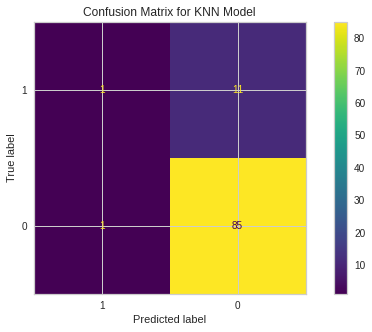


Anomly Detection Report for KNN Model
              precision    recall  f1-score   support

           0       0.89      0.99      0.93        86
           1       0.50      0.08      0.14        12

    accuracy                           0.88        98
   macro avg       0.69      0.54      0.54        98
weighted avg       0.84      0.88      0.84        98



In [11]:
#plot confusion matrix 
getConfusionMatrix(knn_predictions['Anomaly'],anomalyTestingLabels,"Confusion Matrix for {}".format("KNN Model"))
#Anomly Detection Report
print('\nAnomly Detection Report for KNN Model')
print(classification_report(anomalyTestingLabels, knn_predictions['Anomaly'],  target_names =['0','1']))

#### plot 3D TSN so we can see  both anomaly and normal instances

In [12]:
evaluate_model(knn) 


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Anomaly TSnE (3d)', 'tsn…

#### plot the 2D TSNE  to see  both anomaly and normal instances

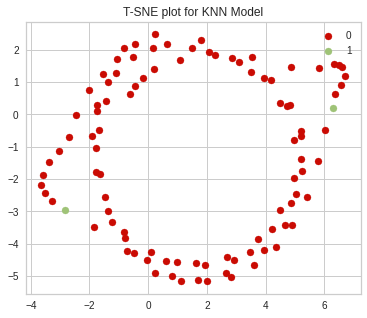

In [13]:
plot_tsne(anomalyTrainingData, knn_predictions['Anomaly'], ['0','1'],"T-SNE plot for KNN Model")

### 4.2 PCA

#### implement the PCA

In [14]:
exp_name = setup(data = anomalyTrainingData)
pca = create_model('pca')
pca_predictions = predict_model(model = pca, data = anomalyTestingData)

#### plot the confusion matrix and classification report for both anomaly and normal instances

[[ 5  7]
 [ 0 86]]


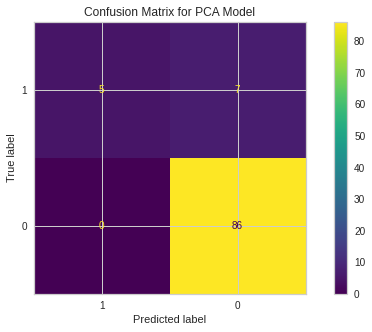


Anomly Detection Report for PCA Model
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        86
           1       1.00      0.42      0.59        12

    accuracy                           0.93        98
   macro avg       0.96      0.71      0.77        98
weighted avg       0.93      0.93      0.92        98



In [15]:

#plot confusion matrix 
getConfusionMatrix(pca_predictions['Anomaly'],anomalyTestingLabels,"Confusion Matrix for {}".format("PCA Model"))
#Anomly Detection Report
print('\nAnomly Detection Report for PCA Model')
print(classification_report(anomalyTestingLabels, pca_predictions['Anomaly'],  target_names =['0','1']))

#### plot 3D TSN so we can see both anomaly and normal instances

In [16]:
evaluate_model(pca) 


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Anomaly TSnE (3d)', 'tsn…

#### plot the 2D TSNE to see both anomaly and normal instances

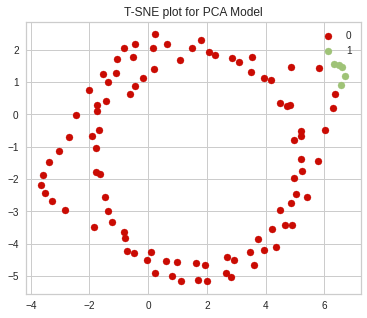

In [17]:
plot_tsne(anomalyTrainingData, pca_predictions['Anomaly'], ['0','1'],"T-SNE plot for PCA Model")

### 4.3 SVM 

#### implement SVM

In [18]:
exp_name = setup(data = anomalyTrainingData)
svm = create_model('svm')
svm_predictions = predict_model(model = svm, data = anomalyTestingData)

#### plot the confusion matrix and classification report for both anomaly and normal instances

[[ 5  7]
 [ 0 86]]


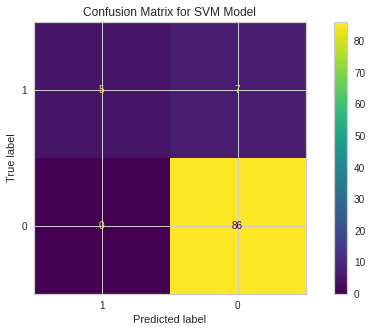


Anomly Detection Report for SVM Model
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        86
           1       1.00      0.42      0.59        12

    accuracy                           0.93        98
   macro avg       0.96      0.71      0.77        98
weighted avg       0.93      0.93      0.92        98



In [19]:
#plot confusion matrix 
getConfusionMatrix(svm_predictions['Anomaly'],anomalyTestingLabels,"Confusion Matrix for {}".format("SVM Model"))
#Anomly Detection Report
print('\nAnomly Detection Report for SVM Model')
print(classification_report(anomalyTestingLabels, svm_predictions['Anomaly'],  target_names =['0','1']))

#### plot 3D TSN so we can see both anomaly and normal instances

In [20]:
evaluate_model(svm) 

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Anomaly TSnE (3d)', 'tsn…

#### plot the 2D TSNE to see both anomaly and normal instances

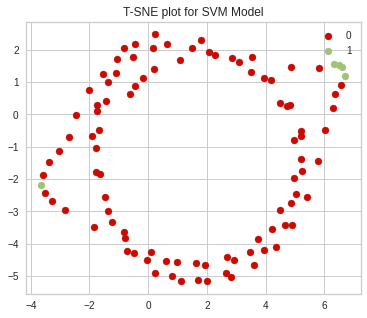

In [21]:
plot_tsne(anomalyTrainingData, svm_predictions['Anomaly'], ['0','1'],"T-SNE plot for SVM Model")

### 4.4 DBSCAN 

#### implement DBSCAN using sklearn Library

##### Grid search to find the best parameter 

In [22]:
from math import nan

max_acc=0
best_epsilon=0.3
best_min_samples=2
#0.3 & 7 
parameters = {'eps':[0.3,0.4,0.5,0.6,0.7], 'min_samples':[2, 15]}
for eps in tqdm(np.arange(0.3, 0.71,0.01)):
  for ms in range(2, 16):
    model = DBSCAN(eps=eps, min_samples=ms)
    predLabels = model.fit_predict(anomalyTrainingData)
    DBscananomalypredLabels=[]
    for val in predLabels :
      if(val!=-1):
        DBscananomalypredLabels.append('0')
      else:
        DBscananomalypredLabels.append('1')

    DBscananomalypredLabels =  [int(i) for i in DBscananomalypredLabels ]
    Dbscan_acc = accuracy_score(anomalyTestingLabels, DBscananomalypredLabels)*100
    if max_acc<Dbscan_acc:
      
      max_acc=Dbscan_acc
      best_epsilon=eps
      best_min_samples=ms
print(max_acc)
print(best_epsilon)
print(best_min_samples)

 

100%|██████████| 41/41 [00:02<00:00, 17.49it/s]

96.93877551020408
0.6100000000000003
10


In [23]:
from math import nan

model = DBSCAN(eps=best_epsilon, min_samples=best_min_samples)
predLabels = model.fit_predict(anomalyTrainingData)
DBscananomalypredLabels=[]
for val in predLabels :
  if(val!=-1):
    DBscananomalypredLabels.append('0')
  else:
    DBscananomalypredLabels.append('1')

DBscananomalypredLabels =  [int(i) for i in DBscananomalypredLabels ]

#### plot the confusion matrix and classification report for both anomaly and normal instances

[[11  1]
 [ 2 84]]


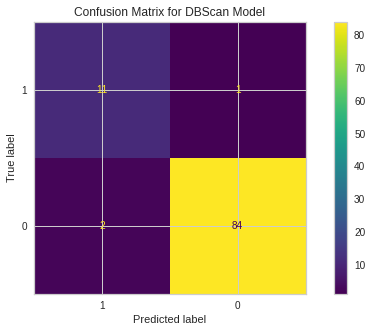


Anomly Detection Report for DBScan Model
              precision    recall  f1-score   support

           0       0.99      0.98      0.98        86
           1       0.85      0.92      0.88        12

    accuracy                           0.97        98
   macro avg       0.92      0.95      0.93        98
weighted avg       0.97      0.97      0.97        98



In [24]:
#plot confusion matrix 
getConfusionMatrix(DBscananomalypredLabels,anomalyTestingLabels,"Confusion Matrix for {}".format("DBScan Model"))
#Anomly Detection Report
print('\nAnomly Detection Report for DBScan Model')
print(classification_report(anomalyTestingLabels,DBscananomalypredLabels,  target_names =['0','1']))

plot 2D TSN so we can see both anomaly and normal instances

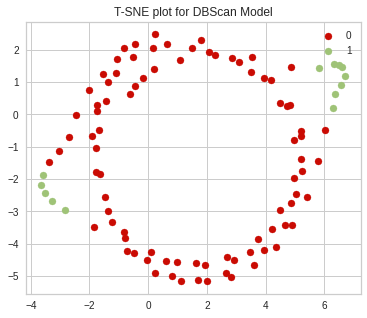

In [25]:
plot_tsne(anomalyTrainingData,  pd.DataFrame(DBscananomalypredLabels).iloc[:,0], ['0','1'],"T-SNE plot for DBScan Model")

### accuracy comparison 

In [26]:
from sklearn.metrics import accuracy_score
knn_acc    = accuracy_score(anomalyTestingLabels, knn_predictions['Anomaly'])*100
PCA_acc    = accuracy_score(anomalyTestingLabels, pca_predictions['Anomaly'])*100
svm_acc    = accuracy_score(anomalyTestingLabels, svm_predictions['Anomaly'])*100
Dbscan_acc = accuracy_score(anomalyTestingLabels, DBscananomalypredLabels)*100
print(f"the accuracy of KNN     model : {knn_acc} %")
print(f"the accuracy of PCA     model : {PCA_acc} %")
print(f"the accuracy of SVM     model : {svm_acc} %")
print(f"the accuracy of DBSCAN  model : {Dbscan_acc} %")

the accuracy of KNN     model : 87.75510204081633 %
the accuracy of PCA     model : 92.85714285714286 %
the accuracy of SVM     model : 92.85714285714286 %
the accuracy of DBSCAN  model : 96.93877551020408 %


    names  Accuracies_Score
0     KNN         87.755102
1     PCA         92.857143
2     SVM         92.857143
3  DBSCAN         96.938776


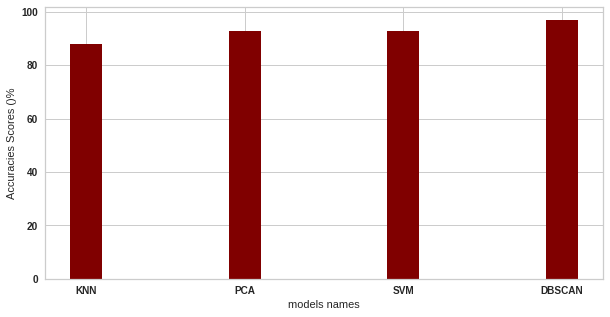

In [27]:
import matplotlib.pyplot as plt
fig = plt.figure()

font = {
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)

df = pd.DataFrame(
   dict
   (
      names=['KNN', 'PCA', 'SVM', 'DBSCAN'],
      Accuracies_Score=[knn_acc,PCA_acc,svm_acc,Dbscan_acc]
   )
)

plt.xlabel('models names')
plt.ylabel('Accuracies Scores ()%')

df_sorted = df.sort_values('Accuracies_Score')
plt.bar('names', 'Accuracies_Score', data=df_sorted, color='maroon',width=0.2)

print(df_sorted)
plt.show()

In [28]:
X_scatter = []
X_scatter_index = []

X_scatter_1 = []
X_scatter_index_1 = []

X_scatter_2 = []
X_scatter_index_2 = []

X_scatter_3 = []
X_scatter_index_3 = []

X_scatter_4 = []
X_scatter_index_4 = []

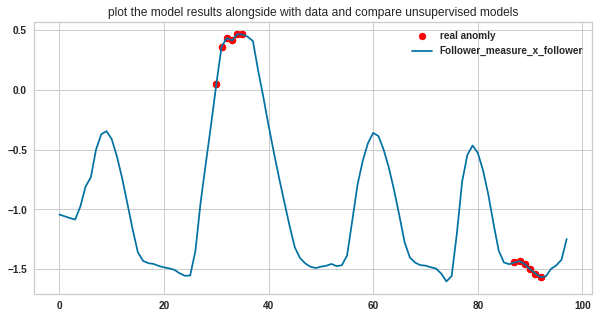

In [35]:
for i in range(len(anomalyTrainingData['Follower_measure_x_follower'])):
  # real anomlies 
  if (anomalyTestingLabels[i]==1 ):
    X_scatter.append(anomalyTrainingData['Follower_measure_x_follower'][i])
    X_scatter_index.append(i)
  

plt.scatter(x=X_scatter_index,y=X_scatter, c = 'red', label = 'real anomly', alpha = 1)
 

plt.title('plot the model results alongside with data and compare unsupervised models')
plt.plot(anomalyTrainingData['Follower_measure_x_follower'],label = 'Follower_measure_x_follower')
plt.legend()
plt.show()

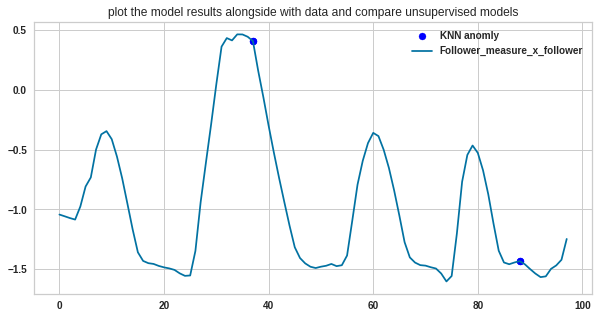

In [36]:

for i in range(len(anomalyTrainingData['Follower_measure_x_follower'])):

  # KNN anomlies 
  if (knn_predictions['Anomaly'][i]==1 ):
    X_scatter_1.append(anomalyTrainingData['Follower_measure_x_follower'][i])
    X_scatter_index_1.append(i)

plt.scatter(x=X_scatter_index_1,y=X_scatter_1, c = 'blue', label = 'KNN anomly', alpha = 1)


plt.title('plot the model results alongside with data and compare unsupervised models')
plt.plot(anomalyTrainingData['Follower_measure_x_follower'],label = 'Follower_measure_x_follower')
plt.legend()
plt.show()

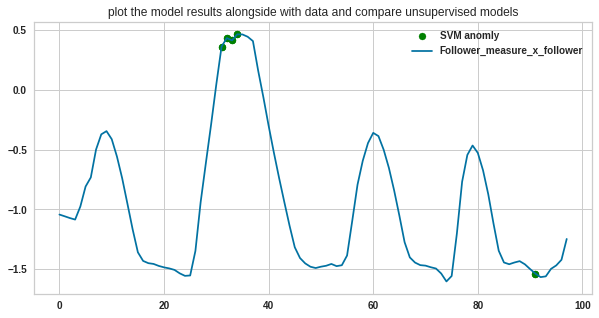

In [37]:
for i in range(len(anomalyTrainingData['Follower_measure_x_follower'])):
  
  # SVM anomlies 
  if (svm_predictions['Anomaly'][i]==1 ):
    X_scatter_2.append(anomalyTrainingData['Follower_measure_x_follower'][i])
    X_scatter_index_2.append(i)
  
 
plt.scatter(x=X_scatter_index_2,y=X_scatter_2, c = 'green', label = 'SVM anomly', alpha = 1)
 

plt.title('plot the model results alongside with data and compare unsupervised models')
plt.plot(anomalyTrainingData['Follower_measure_x_follower'],label = 'Follower_measure_x_follower')
plt.legend()
plt.show()

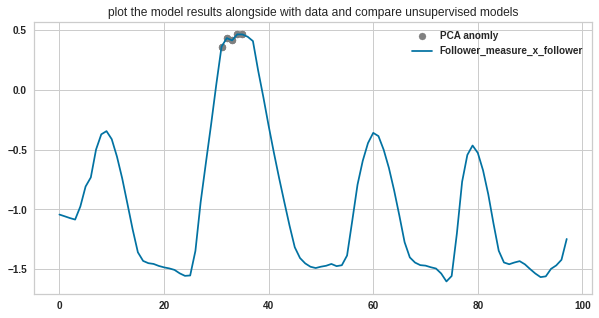

In [38]:
for i in range(len(anomalyTrainingData['Follower_measure_x_follower'])):
  
  # PCA anolies 
  if (pca_predictions['Anomaly'][i]==1 ):
    X_scatter_3.append(anomalyTrainingData['Follower_measure_x_follower'][i])
    X_scatter_index_3.append(i)
 

 
plt.scatter(x=X_scatter_index_3,y=X_scatter_3, c = 'grey', label = 'PCA anomly', alpha = 1)
 
plt.title('plot the model results alongside with data and compare unsupervised models')
plt.plot(anomalyTrainingData['Follower_measure_x_follower'],label = 'Follower_measure_x_follower')
plt.legend()
plt.show()

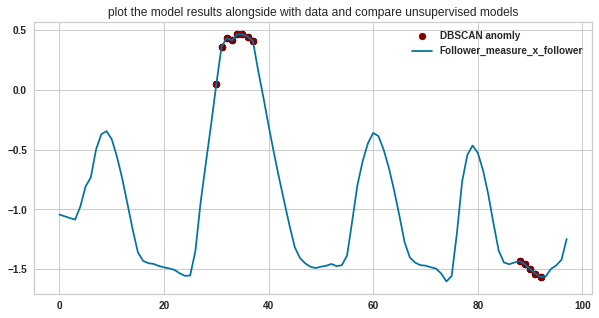

In [39]:
for i in range(len(anomalyTrainingData['Follower_measure_x_follower'])):
   
  # DBSCAN anolies 
  if (DBscananomalypredLabels[i]==1 ):
    X_scatter_4.append(anomalyTrainingData['Follower_measure_x_follower'][i])
    X_scatter_index_4.append(i)


plt.scatter(x=X_scatter_index_4,y=X_scatter_4, c = 'maroon', label = 'DBSCAN anomly', alpha = 1)

plt.title('plot the model results alongside with data and compare unsupervised models')
plt.plot(anomalyTrainingData['Follower_measure_x_follower'],label = 'Follower_measure_x_follower')
plt.legend()
plt.show()